In [1]:
import sys, os
PROJECT_ROOT = "../../../../.."
if os.path.abspath(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, os.path.abspath(PROJECT_ROOT))

In [2]:
# !pip install -e /mnt/user-home/git/coba
# !pip install vowpalwabbit

In [3]:
import itertools as it
import coba as cb
import matplotlib.pyplot as plt

---

## Evaluating Exploration From Logged

Our goal is to use logged data to estimate online exploration performance.

To do this we have three options:
  1. Perform on-policy evaluation using a reward estimator
  2. Perform off-policy evaluation using the logged data
  3. Use rejection sampling to make the logged data look like the desired exploration
  
We will evaluate all three options using logged data that we generate from a large set of classification datasets. By conducting this experiment over many datasets we can get a sense of the expected performance for each method independent of any one dataset. We will also intentionally use a misguided logging policy to generate our data to ensure that the logging policy doesn't look anything like the policies we wish to estimate.  

#### 1. Create evaluation data
To create our logged data we use a `MisguidedLearner`. This learner behaves very differently from the policies we want to evaluate.

In [4]:
envs2 = cb.Environments.cache_dir('.coba_cache').from_template('../templates/class208.json',n_take=100_000,strict=True).chunk()
logs2 = envs2.logged(cb.MisguidedLearner(cb.VowpalEpsilonLearner(),1,-1)).ope_rewards("DR").cache()

#### 2. Define the experiment 

In [5]:
ground_truth  = it.product(envs2,[cb.VowpalEpsilonLearner()],[cb.OnPolicyEvaluator()])
first_option  = it.product(logs2,[cb.VowpalEpsilonLearner()],[cb.OnPolicyEvaluator()])
second_option = it.product(logs2,[cb.VowpalEpsilonLearner()],[cb.OffPolicyEvaluator()])
third_option  = it.product(logs2,[cb.VowpalEpsilonLearner()],[cb.ExplorationEvaluator()])
ee_epsilon_50 = it.product(logs2,[cb.VowpalEpsilonLearner(epsilon=0.5)],[cb.ExplorationEvaluator()])

experiment2 = cb.Experiment(it.chain(ground_truth,first_option,second_option,third_option, ee_epsilon_50))

#### 3. Run the experiment

In [6]:
%%time
#WARNING: This can take some time to finish.
#WARNING: To simply see the results look below.
from datetime import datetime
file_name = f'{datetime.now()}.log'
experiment2.run(file_name,processes=30,quiet=False)

2023-09-28 19:21:15 -- pid-1948   -- Experiment Started
2023-09-28 19:21:16 -- pid-1992   -- Recording Learner 0 parameters... (0.0 seconds) (completed)
2023-09-28 19:21:16 -- pid-1992   -- Recording Evaluator 0 parameters... (0.0 seconds) (completed)
2023-09-28 19:21:16 -- pid-1992   -- Recording Learner 1 parameters... (0.0 seconds) (completed)
2023-09-28 19:21:16 -- pid-1992   -- Recording Evaluator 1 parameters... (0.0 seconds) (completed)
2023-09-28 19:21:16 -- pid-1992   -- Recording Learner 2 parameters... (0.0 seconds) (completed)
2023-09-28 19:21:16 -- pid-1992   -- Recording Evaluator 2 parameters... (0.0 seconds) (completed)
2023-09-28 19:21:16 -- pid-1992   -- Recording Learner 3 parameters... (0.0 seconds) (completed)
2023-09-28 19:21:16 -- pid-1992   -- Recording Evaluator 3 parameters... (0.0 seconds) (completed)
2023-09-28 19:21:16 -- pid-1992   -- Recording Learner 4 parameters... (0.0 seconds) (completed)
2023-09-28 19:21:16 -- pid-1992   -- Recording Evaluator 4 para

2023-09-28 19:21:16 -- pid-2010   -- Peeking at Environment 214... (0.06 seconds) (completed)
2023-09-28 19:21:16 -- pid-2010   -- Environment 214 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:21:16 -- pid-2014   -- Peeking at Environment 10... (0.18 seconds) (completed)
2023-09-28 19:21:16 -- pid-2014   -- Environment 10 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:21:16 -- pid-1992   -- Peeking at Environment 14... (0.2 seconds) (completed)
2023-09-28 19:21:16 -- pid-1992   -- Environment 14 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:21:16 -- pid-2024   -- Peeking at Environment 223... (0.3 seconds) (completed)
2023-09-28 19:21:16 -- pid-2024   -- Recording Environment 223 parameters... (0.0 seconds) (completed)
2023-09-28 19:21:16 -- pid-2020   -- Peeking at Environment 221... (0.29 seconds) (completed)
2023-09-28 19:21:16 -- pid-2020   -- Record

2023-09-28 19:21:19 -- pid-2046   -- Peeking at Environment 238... (1.22 seconds) (completed)
2023-09-28 19:21:19 -- pid-2046   -- Recording Environment 238 parameters... (0.0 seconds) (completed)
2023-09-28 19:21:20 -- pid-2014   -- Peeking at Environment 255... (0.55 seconds) (completed)
2023-09-28 19:21:20 -- pid-2014   -- Environment 255 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:21:20 -- pid-2046   -- Peeking at Environment 238... (0.72 seconds) (completed)
2023-09-28 19:21:20 -- pid-2046   -- Environment 238 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:21:22 -- pid-2002   -- Peeking at Environment 43... (4.94 seconds) (completed)
2023-09-28 19:21:22 -- pid-2002   -- Recording Environment 43 parameters... (0.0 seconds) (completed)
2023-09-28 19:21:24 -- pid-2024   -- Peeking at Environment 36... (7.0 seconds) (completed)
2023-09-28 19:21:24 -- pid-2024   -- Recording Environment 36 parame

2023-09-28 19:21:57 -- pid-2042   -- Peeking at Environment 23... (20.13 seconds) (completed)
2023-09-28 19:21:57 -- pid-2030   -- Peeking at Environment 37... (20.81 seconds) (completed)
2023-09-28 19:21:58 -- pid-2000   -- Peeking at Environment 33... (20.89 seconds) (completed)
2023-09-28 19:22:00 -- pid-2020   -- Peeking at Environment 38... (21.72 seconds) (completed)
2023-09-28 19:22:02 -- pid-2024   -- Evaluating Learner 0 on Environment 36... (31.66 seconds) (completed)
2023-09-28 19:22:03 -- pid-2022   -- Peeking at Environment 44... (23.25 seconds) (completed)
2023-09-28 19:22:04 -- pid-2024   -- Peeking at Environment 244... (1.82 seconds) (completed)
2023-09-28 19:22:04 -- pid-2024   -- Recording Environment 244 parameters... (0.02 seconds) (completed)
2023-09-28 19:22:06 -- pid-2046   -- Peeking at Environment 51... (21.69 seconds) (completed)
2023-09-28 19:22:06 -- pid-2024   -- Peeking at Environment 244... (1.74 seconds) (completed)
2023-09-28 19:22:06 -- pid-2010   -- 

2023-09-28 19:22:36 -- pid-2046   -- Peeking at Environment 259... (1.3 seconds) (completed)
2023-09-28 19:22:37 -- pid-2008   -- Peeking at Environment 248... (2.35 seconds) (completed)
2023-09-28 19:22:37 -- pid-2008   -- Recording Environment 248 parameters... (0.02 seconds) (completed)
2023-09-28 19:22:39 -- pid-2038   -- Evaluating Learner 0 on Environment 39... (50.38 seconds) (completed)
2023-09-28 19:22:40 -- pid-2008   -- Peeking at Environment 248... (2.28 seconds) (completed)
2023-09-28 19:22:41 -- pid-2038   -- Peeking at Environment 247... (2.69 seconds) (completed)
2023-09-28 19:22:41 -- pid-2038   -- Recording Environment 247 parameters... (0.02 seconds) (completed)
2023-09-28 19:22:43 -- pid-2042   -- Evaluating Learner 0 on Environment 23... (45.73 seconds) (completed)
2023-09-28 19:22:43 -- pid-2038   -- Peeking at Environment 247... (2.06 seconds) (completed)
2023-09-28 19:22:45 -- pid-2042   -- Peeking at Environment 231... (2.21 seconds) (completed)
2023-09-28 19:2

2023-09-28 19:23:47 -- pid-2004   -- Evaluating Learner 3 on Environment 249... (13.44 seconds) (completed)
2023-09-28 19:23:47 -- pid-2004   -- Peeking at Environment 249... (0.0 seconds) (completed)
2023-09-28 19:23:48 -- pid-2030   -- Evaluating Learner 3 on Environment 245... (11.4 seconds) (completed)
2023-09-28 19:23:48 -- pid-2030   -- Peeking at Environment 245... (0.0 seconds) (completed)
2023-09-28 19:23:48 -- pid-2026   -- Evaluating Learner 2 on Environment 257... (17.45 seconds) (completed)
2023-09-28 19:23:48 -- pid-2026   -- Peeking at Environment 257... (0.0 seconds) (completed)
2023-09-28 19:23:49 -- pid-1998   -- Evaluating Learner 4 on Environment 239... (9.91 seconds) (completed)
2023-09-28 19:23:50 -- pid-2000   -- Evaluating Learner 2 on Environment 241... (21.97 seconds) (completed)
2023-09-28 19:23:50 -- pid-2000   -- Peeking at Environment 241... (0.0 seconds) (completed)
2023-09-28 19:23:50 -- pid-2040   -- Peeking at Environment 53... (3.95 seconds) (complete

2023-09-28 19:24:23 -- pid-2016   -- Evaluating Learner 2 on Environment 240... (26.21 seconds) (completed)
2023-09-28 19:24:23 -- pid-2016   -- Peeking at Environment 240... (0.0 seconds) (completed)
2023-09-28 19:24:24 -- pid-2010   -- Peeking at Environment 54... (20.22 seconds) (completed)
2023-09-28 19:24:25 -- pid-2024   -- Evaluating Learner 4 on Environment 244... (13.91 seconds) (completed)
2023-09-28 19:24:25 -- pid-2044   -- Peeking at Environment 234... (5.56 seconds) (completed)
2023-09-28 19:24:25 -- pid-2044   -- Recording Environment 234 parameters... (0.02 seconds) (completed)
2023-09-28 19:24:27 -- pid-2032   -- Evaluating Learner 3 on Environment 232... (14.77 seconds) (completed)
2023-09-28 19:24:27 -- pid-2032   -- Peeking at Environment 232... (0.0 seconds) (completed)
2023-09-28 19:24:28 -- pid-2034   -- Peeking at Environment 60... (17.61 seconds) (completed)
2023-09-28 19:24:28 -- pid-2034   -- Recording Environment 60 parameters... (0.0 seconds) (completed)
20

2023-09-28 19:25:09 -- pid-1992   -- Peeking at Environment 68... (0.82 seconds) (completed)
2023-09-28 19:25:09 -- pid-1992   -- Environment 68 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:25:10 -- pid-1992   -- Peeking at Environment 276... (1.13 seconds) (completed)
2023-09-28 19:25:10 -- pid-1992   -- Recording Environment 276 parameters... (0.0 seconds) (completed)
2023-09-28 19:25:10 -- pid-2032   -- Peeking at Environment 64... (23.19 seconds) (completed)
2023-09-28 19:25:10 -- pid-2032   -- Recording Environment 64 parameters... (0.0 seconds) (completed)
2023-09-28 19:25:10 -- pid-2018   -- Evaluating Learner 2 on Environment 253... (27.68 seconds) (completed)
2023-09-28 19:25:10 -- pid-2018   -- Peeking at Environment 253... (0.0 seconds) (completed)
2023-09-28 19:25:11 -- pid-1992   -- Peeking at Environment 276... (1.06 seconds) (completed)
2023-09-28 19:25:11 -- pid-1992   -- Environment 276 has nothing to evaluate (this is like

2023-09-28 19:25:32 -- pid-2020   -- Evaluating Learner 1 on Environment 246... (153.04 seconds) (completed)
2023-09-28 19:25:32 -- pid-2020   -- Peeking at Environment 246... (0.0 seconds) (completed)
2023-09-28 19:25:34 -- pid-2026   -- Peeking at Environment 269... (1.89 seconds) (completed)
2023-09-28 19:25:34 -- pid-2006   -- Evaluating Learner 4 on Environment 250... (14.83 seconds) (completed)
2023-09-28 19:25:38 -- pid-2040   -- Evaluating Learner 3 on Environment 261... (10.03 seconds) (completed)
2023-09-28 19:25:38 -- pid-2040   -- Peeking at Environment 261... (0.0 seconds) (completed)
2023-09-28 19:25:39 -- pid-1996   -- Peeking at Environment 67... (35.15 seconds) (completed)
2023-09-28 19:25:39 -- pid-1996   -- Recording Environment 67 parameters... (0.0 seconds) (completed)
2023-09-28 19:25:39 -- pid-2016   -- Evaluating Learner 0 on Environment 65... (16.61 seconds) (completed)
2023-09-28 19:25:40 -- pid-2016   -- Peeking at Environment 273... (0.95 seconds) (completed

2023-09-28 19:26:19 -- pid-2014   -- Peeking at Environment 83... (9.63 seconds) (completed)
2023-09-28 19:26:19 -- pid-2014   -- Recording Environment 83 parameters... (0.0 seconds) (completed)
2023-09-28 19:26:21 -- pid-2008   -- Peeking at Environment 79... (14.96 seconds) (completed)
2023-09-28 19:26:21 -- pid-2002   -- Evaluating Learner 0 on Environment 74... (18.4 seconds) (completed)
2023-09-28 19:26:22 -- pid-2006   -- Peeking at Environment 76... (22.21 seconds) (completed)
2023-09-28 19:26:23 -- pid-2002   -- Peeking at Environment 282... (1.34 seconds) (completed)
2023-09-28 19:26:23 -- pid-2002   -- Recording Environment 282 parameters... (0.02 seconds) (completed)
2023-09-28 19:26:24 -- pid-2002   -- Peeking at Environment 282... (1.27 seconds) (completed)
2023-09-28 19:26:24 -- pid-2038   -- Peeking at Environment 82... (16.68 seconds) (completed)
2023-09-28 19:26:24 -- pid-2038   -- Recording Environment 82 parameters... (0.0 seconds) (completed)
2023-09-28 19:26:25 -- 

2023-09-28 19:27:18 -- pid-2042   -- Evaluating Learner 0 on Environment 84... (24.12 seconds) (completed)
2023-09-28 19:27:19 -- pid-2010   -- Evaluating Learner 4 on Environment 262... (15.06 seconds) (completed)
2023-09-28 19:27:20 -- pid-2042   -- Peeking at Environment 292... (1.42 seconds) (completed)
2023-09-28 19:27:20 -- pid-2042   -- Recording Environment 292 parameters... (0.02 seconds) (completed)
2023-09-28 19:27:21 -- pid-2026   -- Evaluating Learner 1 on Environment 269... (107.2 seconds) (completed)
2023-09-28 19:27:21 -- pid-2026   -- Peeking at Environment 269... (0.0 seconds) (completed)
2023-09-28 19:27:21 -- pid-2042   -- Peeking at Environment 292... (1.36 seconds) (completed)
2023-09-28 19:27:22 -- pid-2016   -- Peeking at Environment 87... (16.98 seconds) (completed)
2023-09-28 19:27:22 -- pid-2016   -- Recording Environment 87 parameters... (0.01 seconds) (completed)
2023-09-28 19:27:22 -- pid-2002   -- Evaluating Learner 1 on Environment 282... (57.77 seconds)

2023-09-28 19:28:26 -- pid-2028   -- Evaluating Learner 0 on Environment 85... (53.04 seconds) (completed)
2023-09-28 19:28:26 -- pid-2042   -- Evaluating Learner 1 on Environment 292... (65.08 seconds) (completed)
2023-09-28 19:28:26 -- pid-2042   -- Peeking at Environment 292... (0.0 seconds) (completed)
2023-09-28 19:28:27 -- pid-2016   -- Peeking at Environment 295... (2.55 seconds) (completed)
2023-09-28 19:28:27 -- pid-2052   -- Evaluating Learner 0 on Environment 75... (139.47 seconds) (completed)
2023-09-28 19:28:28 -- pid-2028   -- Peeking at Environment 293... (2.29 seconds) (completed)
2023-09-28 19:28:28 -- pid-2028   -- Recording Environment 293 parameters... (0.01 seconds) (completed)
2023-09-28 19:28:29 -- pid-2018   -- Evaluating Learner 2 on Environment 285... (22.07 seconds) (completed)
2023-09-28 19:28:29 -- pid-2018   -- Peeking at Environment 285... (0.0 seconds) (completed)
2023-09-28 19:28:30 -- pid-2040   -- Evaluating Learner 2 on Environment 289... (16.57 seco

2023-09-28 19:29:05 -- pid-2018   -- Peeking at Environment 100... (0.22 seconds) (completed)
2023-09-28 19:29:05 -- pid-2018   -- Recording Environment 100 parameters... (0.0 seconds) (completed)
2023-09-28 19:29:05 -- pid-2018   -- Peeking at Environment 100... (0.19 seconds) (completed)
2023-09-28 19:29:05 -- pid-2018   -- Environment 100 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:29:06 -- pid-2018   -- Peeking at Environment 308... (0.22 seconds) (completed)
2023-09-28 19:29:06 -- pid-2018   -- Recording Environment 308 parameters... (0.0 seconds) (completed)
2023-09-28 19:29:06 -- pid-2030   -- Evaluating Learner 4 on Environment 265... (22.37 seconds) (completed)
2023-09-28 19:29:06 -- pid-2018   -- Peeking at Environment 308... (0.15 seconds) (completed)
2023-09-28 19:29:06 -- pid-2018   -- Environment 308 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:29:06 -- pid-2046   -- Peeking at En

2023-09-28 19:29:23 -- pid-2032   -- Peeking at Environment 301... (1.16 seconds) (completed)
2023-09-28 19:29:24 -- pid-2014   -- Peeking at Environment 316... (0.65 seconds) (completed)
2023-09-28 19:29:24 -- pid-2014   -- Environment 316 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:29:24 -- pid-2014   -- Peeking at Environment 109... (0.24 seconds) (completed)
2023-09-28 19:29:24 -- pid-2014   -- Recording Environment 109 parameters... (0.0 seconds) (completed)
2023-09-28 19:29:24 -- pid-2014   -- Peeking at Environment 109... (0.25 seconds) (completed)
2023-09-28 19:29:24 -- pid-2014   -- Environment 109 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:29:24 -- pid-2014   -- Peeking at Environment 317... (0.32 seconds) (completed)
2023-09-28 19:29:24 -- pid-2014   -- Recording Environment 317 parameters... (0.0 seconds) (completed)
2023-09-28 19:29:25 -- pid-2014   -- Peeking at Environment 317.

2023-09-28 19:29:30 -- pid-2014   -- Peeking at Environment 118... (0.31 seconds) (completed)
2023-09-28 19:29:30 -- pid-2014   -- Environment 118 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:29:30 -- pid-2050   -- Peeking at Environment 325... (0.25 seconds) (completed)
2023-09-28 19:29:30 -- pid-2050   -- Recording Environment 325 parameters... (0.0 seconds) (completed)
2023-09-28 19:29:30 -- pid-2042   -- Peeking at Environment 98... (25.65 seconds) (completed)
2023-09-28 19:29:30 -- pid-2042   -- Recording Environment 98 parameters... (0.0 seconds) (completed)
2023-09-28 19:29:30 -- pid-2050   -- Peeking at Environment 325... (0.2 seconds) (completed)
2023-09-28 19:29:30 -- pid-2050   -- Environment 325 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:29:30 -- pid-2014   -- Peeking at Environment 326... (0.32 seconds) (completed)
2023-09-28 19:29:30 -- pid-2014   -- Recording Environment 326 par

2023-09-28 19:29:36 -- pid-2050   -- Peeking at Environment 334... (0.26 seconds) (completed)
2023-09-28 19:29:36 -- pid-2050   -- Environment 334 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:29:36 -- pid-2014   -- Peeking at Environment 335... (0.19 seconds) (completed)
2023-09-28 19:29:36 -- pid-2014   -- Recording Environment 335 parameters... (0.0 seconds) (completed)
2023-09-28 19:29:36 -- pid-2050   -- Peeking at Environment 128... (0.13 seconds) (completed)
2023-09-28 19:29:36 -- pid-2050   -- Recording Environment 128 parameters... (0.0 seconds) (completed)
2023-09-28 19:29:36 -- pid-2050   -- Peeking at Environment 128... (0.1 seconds) (completed)
2023-09-28 19:29:36 -- pid-2050   -- Environment 128 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:29:36 -- pid-2014   -- Peeking at Environment 335... (0.23 seconds) (completed)
2023-09-28 19:29:36 -- pid-2014   -- Environment 335 has nothing 

2023-09-28 19:29:38 -- pid-2014   -- Peeking at Environment 341... (0.17 seconds) (completed)
2023-09-28 19:29:38 -- pid-2014   -- Environment 341 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:29:39 -- pid-2040   -- Peeking at Environment 97... (21.83 seconds) (completed)
2023-09-28 19:29:41 -- pid-2018   -- Peeking at Environment 102... (35.01 seconds) (completed)
2023-09-28 19:29:41 -- pid-2018   -- Recording Environment 102 parameters... (0.0 seconds) (completed)
2023-09-28 19:29:43 -- pid-2000   -- Evaluating Learner 3 on Environment 270... (27.16 seconds) (completed)
2023-09-28 19:29:43 -- pid-2000   -- Peeking at Environment 270... (0.0 seconds) (completed)
2023-09-28 19:29:46 -- pid-2030   -- Peeking at Environment 101... (17.5 seconds) (completed)
2023-09-28 19:29:47 -- pid-1998   -- Evaluating Learner 1 on Environment 299... (50.7 seconds) (completed)
2023-09-28 19:29:47 -- pid-1998   -- Peeking at Environment 299... (0.0 seconds) (

2023-09-28 19:30:24 -- pid-2048   -- Evaluating Learner 3 on Environment 235... (47.23 seconds) (completed)
2023-09-28 19:30:24 -- pid-2048   -- Peeking at Environment 235... (0.0 seconds) (completed)
2023-09-28 19:30:25 -- pid-2042   -- Peeking at Environment 306... (1.34 seconds) (completed)
2023-09-28 19:30:25 -- pid-2004   -- Peeking at Environment 144... (2.26 seconds) (completed)
2023-09-28 19:30:25 -- pid-2004   -- Recording Environment 144 parameters... (0.01 seconds) (completed)
2023-09-28 19:30:25 -- pid-1998   -- Evaluating Learner 4 on Environment 299... (10.32 seconds) (completed)
2023-09-28 19:30:26 -- pid-2012   -- Evaluating Learner 3 on Environment 242... (47.85 seconds) (completed)
2023-09-28 19:30:26 -- pid-2012   -- Peeking at Environment 242... (0.0 seconds) (completed)
2023-09-28 19:30:26 -- pid-2004   -- Peeking at Environment 144... (0.87 seconds) (completed)
2023-09-28 19:30:26 -- pid-2004   -- Environment 144 has nothing to evaluate (this is likely due to havi

2023-09-28 19:30:59 -- pid-2034   -- Peeking at Environment 152... (0.13 seconds) (completed)
2023-09-28 19:30:59 -- pid-2034   -- Recording Environment 152 parameters... (0.0 seconds) (completed)
2023-09-28 19:30:59 -- pid-2034   -- Peeking at Environment 152... (0.12 seconds) (completed)
2023-09-28 19:30:59 -- pid-2034   -- Environment 152 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:31:00 -- pid-2016   -- Evaluating Learner 2 on Environment 295... (30.71 seconds) (completed)
2023-09-28 19:31:00 -- pid-2000   -- Peeking at Environment 351... (0.86 seconds) (completed)
2023-09-28 19:31:00 -- pid-2000   -- Recording Environment 351 parameters... (0.01 seconds) (completed)
2023-09-28 19:31:00 -- pid-2016   -- Peeking at Environment 295... (0.0 seconds) (completed)
2023-09-28 19:31:00 -- pid-2034   -- Peeking at Environment 360... (1.12 seconds) (completed)
2023-09-28 19:31:00 -- pid-2034   -- Recording Environment 360 parameters... (0.0 seco

2023-09-28 19:31:12 -- pid-2012   -- Environment 159 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:31:12 -- pid-2010   -- Peeking at Environment 157... (1.02 seconds) (completed)
2023-09-28 19:31:12 -- pid-2010   -- Environment 157 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:31:13 -- pid-2012   -- Peeking at Environment 367... (0.14 seconds) (completed)
2023-09-28 19:31:13 -- pid-2012   -- Recording Environment 367 parameters... (0.0 seconds) (completed)
2023-09-28 19:31:13 -- pid-2010   -- Peeking at Environment 365... (0.1 seconds) (completed)
2023-09-28 19:31:13 -- pid-2010   -- Recording Environment 365 parameters... (0.0 seconds) (completed)
2023-09-28 19:31:13 -- pid-2010   -- Peeking at Environment 365... (0.09 seconds) (completed)
2023-09-28 19:31:13 -- pid-2010   -- Environment 365 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:31:13 -- pid-20

2023-09-28 19:31:21 -- pid-2048   -- Peeking at Environment 378... (0.04 seconds) (completed)
2023-09-28 19:31:21 -- pid-2048   -- Recording Environment 378 parameters... (0.0 seconds) (completed)
2023-09-28 19:31:21 -- pid-2048   -- Peeking at Environment 378... (0.04 seconds) (completed)
2023-09-28 19:31:21 -- pid-2048   -- Environment 378 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:31:21 -- pid-2048   -- Peeking at Environment 171... (0.02 seconds) (completed)
2023-09-28 19:31:21 -- pid-2048   -- Recording Environment 171 parameters... (0.0 seconds) (completed)
2023-09-28 19:31:21 -- pid-2048   -- Peeking at Environment 171... (0.02 seconds) (completed)
2023-09-28 19:31:21 -- pid-2048   -- Environment 171 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:31:21 -- pid-2048   -- Peeking at Environment 379... (0.04 seconds) (completed)
2023-09-28 19:31:21 -- pid-2048   -- Recording Environment 379 p

2023-09-28 19:31:27 -- pid-1998   -- Peeking at Environment 355... (1.21 seconds) (completed)
2023-09-28 19:31:28 -- pid-2042   -- Evaluating Learner 1 on Environment 306... (63.25 seconds) (completed)
2023-09-28 19:31:28 -- pid-2042   -- Peeking at Environment 306... (0.0 seconds) (completed)
2023-09-28 19:31:29 -- pid-2036   -- Evaluating Learner 2 on Environment 230... (72.9 seconds) (completed)
2023-09-28 19:31:29 -- pid-2036   -- Peeking at Environment 230... (0.0 seconds) (completed)
2023-09-28 19:31:29 -- pid-2020   -- Peeking at Environment 179... (4.18 seconds) (completed)
2023-09-28 19:31:29 -- pid-2020   -- Recording Environment 179 parameters... (0.0 seconds) (completed)
2023-09-28 19:31:30 -- pid-2046   -- Peeking at Environment 178... (5.42 seconds) (completed)
2023-09-28 19:31:30 -- pid-2046   -- Recording Environment 178 parameters... (0.0 seconds) (completed)
2023-09-28 19:31:33 -- pid-2020   -- Peeking at Environment 179... (3.41 seconds) (completed)
2023-09-28 19:31:

2023-09-28 19:32:01 -- pid-2046   -- Peeking at Environment 184... (20.25 seconds) (completed)
2023-09-28 19:32:01 -- pid-2046   -- Recording Environment 184 parameters... (0.0 seconds) (completed)
2023-09-28 19:32:02 -- pid-2016   -- Peeking at Environment 186... (18.72 seconds) (completed)
2023-09-28 19:32:02 -- pid-2016   -- Recording Environment 186 parameters... (0.01 seconds) (completed)
2023-09-28 19:32:03 -- pid-2006   -- Peeking at Environment 356... (2.03 seconds) (completed)
2023-09-28 19:32:03 -- pid-2030   -- Evaluating Learner 4 on Environment 309... (15.3 seconds) (completed)
2023-09-28 19:32:03 -- pid-2026   -- Evaluating Learner 4 on Environment 302... (14.11 seconds) (completed)
2023-09-28 19:32:04 -- pid-2004   -- Evaluating Learner 0 on Environment 146... (66.28 seconds) (completed)
2023-09-28 19:32:04 -- pid-2018   -- Evaluating Learner 3 on Environment 310... (11.24 seconds) (completed)
2023-09-28 19:32:04 -- pid-2018   -- Peeking at Environment 310... (0.0 second

2023-09-28 19:32:35 -- pid-2012   -- Peeking at Environment 373... (2.82 seconds) (completed)
2023-09-28 19:32:35 -- pid-2012   -- Recording Environment 373 parameters... (0.01 seconds) (completed)
2023-09-28 19:32:36 -- pid-2000   -- Peeking at Environment 402... (1.14 seconds) (completed)
2023-09-28 19:32:36 -- pid-2000   -- Environment 402 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:32:37 -- pid-2000   -- Peeking at Environment 196... (1.02 seconds) (completed)
2023-09-28 19:32:37 -- pid-2000   -- Recording Environment 196 parameters... (0.0 seconds) (completed)
2023-09-28 19:32:37 -- pid-2032   -- Peeking at Environment 370... (2.21 seconds) (completed)
2023-09-28 19:32:38 -- pid-2012   -- Peeking at Environment 373... (2.25 seconds) (completed)
2023-09-28 19:32:38 -- pid-2000   -- Peeking at Environment 196... (1.07 seconds) (completed)
2023-09-28 19:32:38 -- pid-2000   -- Environment 196 has nothing to evaluate (this is likely due to

2023-09-28 19:32:54 -- pid-2040   -- Peeking at Environment 410... (0.04 seconds) (completed)
2023-09-28 19:32:54 -- pid-2040   -- Environment 410 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:32:54 -- pid-2040   -- Peeking at Environment 203... (0.02 seconds) (completed)
2023-09-28 19:32:54 -- pid-2040   -- Recording Environment 203 parameters... (0.0 seconds) (completed)
2023-09-28 19:32:54 -- pid-2040   -- Peeking at Environment 203... (0.02 seconds) (completed)
2023-09-28 19:32:54 -- pid-2040   -- Environment 203 has nothing to evaluate (this is likely due to having too few interactions).
2023-09-28 19:32:54 -- pid-2040   -- Peeking at Environment 411... (0.03 seconds) (completed)
2023-09-28 19:32:54 -- pid-2040   -- Recording Environment 411 parameters... (0.0 seconds) (completed)
2023-09-28 19:32:54 -- pid-2040   -- Peeking at Environment 411... (0.03 seconds) (completed)
2023-09-28 19:32:54 -- pid-2040   -- Environment 411 has nothing

2023-09-28 19:33:27 -- pid-2000   -- Peeking at Environment 409... (0.8 seconds) (completed)
2023-09-28 19:33:27 -- pid-2000   -- Recording Environment 409 parameters... (0.01 seconds) (completed)
2023-09-28 19:33:28 -- pid-2000   -- Peeking at Environment 409... (0.75 seconds) (completed)
2023-09-28 19:33:31 -- pid-2024   -- Evaluating Learner 0 on Environment 195... (46.8 seconds) (completed)
2023-09-28 19:33:34 -- pid-2024   -- Peeking at Environment 403... (2.75 seconds) (completed)
2023-09-28 19:33:34 -- pid-2024   -- Recording Environment 403 parameters... (0.02 seconds) (completed)
2023-09-28 19:33:35 -- pid-2002   -- Evaluating Learner 1 on Environment 389... (52.38 seconds) (completed)
2023-09-28 19:33:35 -- pid-2002   -- Peeking at Environment 389... (0.0 seconds) (completed)
2023-09-28 19:33:36 -- pid-2024   -- Peeking at Environment 403... (2.09 seconds) (completed)
2023-09-28 19:33:36 -- pid-2048   -- Evaluating Learner 1 on Environment 388... (72.58 seconds) (completed)
2

2023-09-28 19:34:26 -- pid-2044   -- Evaluating Learner 4 on Environment 398... (11.25 seconds) (completed)
2023-09-28 19:34:26 -- pid-2048   -- Evaluating Learner 4 on Environment 388... (12.33 seconds) (completed)
2023-09-28 19:34:30 -- pid-2042   -- Evaluating Learner 4 on Environment 397... (9.35 seconds) (completed)
2023-09-28 19:34:32 -- pid-2026   -- Evaluating Learner 3 on Environment 396... (10.38 seconds) (completed)
2023-09-28 19:34:32 -- pid-2026   -- Peeking at Environment 396... (0.0 seconds) (completed)
2023-09-28 19:34:33 -- pid-2000   -- Evaluating Learner 3 on Environment 409... (8.74 seconds) (completed)
2023-09-28 19:34:33 -- pid-2000   -- Peeking at Environment 409... (0.0 seconds) (completed)
2023-09-28 19:34:36 -- pid-1992   -- Evaluating Learner 2 on Environment 357... (24.59 seconds) (completed)
2023-09-28 19:34:36 -- pid-1992   -- Peeking at Environment 357... (0.0 seconds) (completed)
2023-09-28 19:34:41 -- pid-2000   -- Evaluating Learner 4 on Environment 40

2023-09-28 19:38:20 -- pid-2034   -- Evaluating Learner 3 on Environment 363... (41.82 seconds) (completed)
2023-09-28 19:38:20 -- pid-2034   -- Peeking at Environment 363... (0.0 seconds) (completed)
2023-09-28 19:38:36 -- pid-2050   -- Evaluating Learner 1 on Environment 345... (250.74 seconds) (completed)
2023-09-28 19:38:36 -- pid-2050   -- Peeking at Environment 345... (0.0 seconds) (completed)
2023-09-28 19:38:54 -- pid-2014   -- Evaluating Learner 3 on Environment 346... (48.05 seconds) (completed)
2023-09-28 19:38:54 -- pid-2014   -- Peeking at Environment 346... (0.0 seconds) (completed)
2023-09-28 19:39:00 -- pid-2034   -- Evaluating Learner 4 on Environment 363... (39.97 seconds) (completed)
2023-09-28 19:39:01 -- pid-2020   -- Evaluating Learner 2 on Environment 393... (50.45 seconds) (completed)
2023-09-28 19:39:01 -- pid-2020   -- Peeking at Environment 393... (0.0 seconds) (completed)
2023-09-28 19:39:30 -- pid-2050   -- Evaluating Learner 2 on Environment 345... (54.4 s

#### 4. Analyze the results

We plot the experimental results to see which one of our three options best utilized the logged data to predict online performance.

In [7]:
result2 = cb.Result.from_save(file_name)

In [8]:
df = result2.interactions.to_pandas()
df

,environment_id,learner_id,evaluator_id,index,reward
0,20,0,0,1,1.00000
1,20,0,0,2,1.00000
2,20,0,0,3,1.00000
3,20,0,0,4,1.00000
4,20,0,0,5,1.00000
...,...,...,...,...,...
29551288,409,4,4,3275,0.66605
29551289,409,4,4,3276,0.60029
29551290,409,4,4,3277,1.00000
29551291,409,4,4,3278,0.73377


In [24]:
result2.learners.to_pandas()

,learner_id,args,family
0,0,--cb_explore_adf --epsilon 0.05 --random_seed ...,vw
1,1,--cb_explore_adf --epsilon 0.05 --random_seed ...,vw
2,2,--cb_explore_adf --epsilon 0.05 --random_seed ...,vw
3,3,--cb_explore_adf --epsilon 0.05 --random_seed ...,vw
4,4,--cb_explore_adf --epsilon 0.5 --random_seed 1...,vw


In [9]:
df.groupby(['learner_id']).environment_id.nunique()

learner_id
0    97
1    97
2    97
3    97
4    97
Name: environment_id, dtype: int64

We removed 25 learner evaluations because they were shorter than 1000 interactions.
We shortened 460 environments because they were longer than the shortest environment.
We removed 25 openml_task because they did not exist for every ['ope_reward', 'eval_type', 'learner_id'].


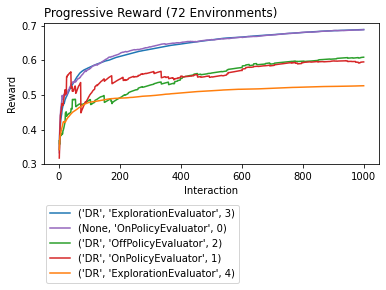

In [33]:
# Comparison of different policies
result2.filter_fin(1000).plot_learners(l=['ope_reward','eval_type', 'learner_id'],p='openml_task')

We removed 79 learner evaluations because they were shorter than 2000 interactions.
We shortened 406 environments because they were longer than the shortest environment.
We removed 47 openml_task because they did not exist for every ['ope_reward', 'eval_type', 'learner_id'].


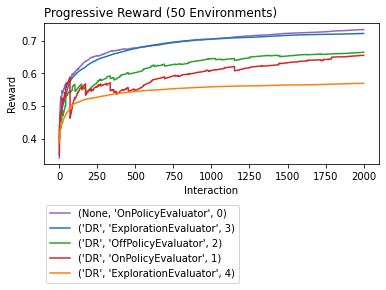

In [34]:
# On more data
result2.filter_fin(2000).plot_learners(l=['ope_reward','eval_type', 'learner_id'],p='openml_task')

We shortened 193 environments because they were longer than the shortest environment.


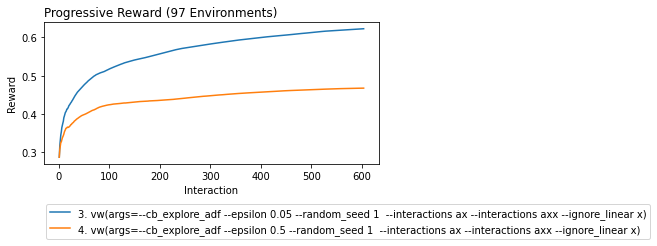

In [35]:
# Contrasting the two exploration policies
result2.filter_val(eval_type={'=':'ExplorationEvaluator'}).plot_learners()

In this plot the third option looks pretty good. It almost perfectly matches the average online performance across 75 unique classification datasets. Unfortunately, this plot isn't the full story. To get this accuracy we had to sacrafice some data. Notice that the plot above only has 1,000 interactions but our original dataset had 100,000 examples.

We now create a plot that shows the all 100,000 examples so we can see how much data we threw out when using the ExplorationEvaluator.

We removed 25 learner evaluations because they were shorter than 1000 interactions.
We shortened 169 environments because they were longer than the shortest environment.
We removed 25 environment_id because they did not exist for every full_name.


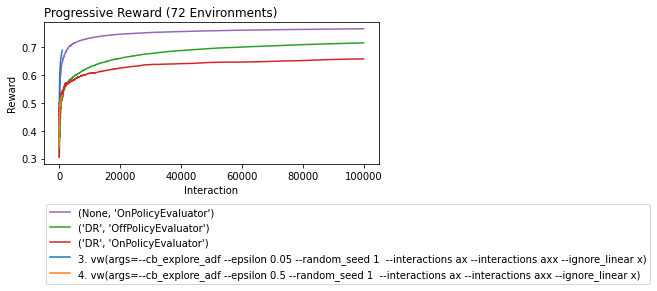

In [32]:
# Visualiziing the whole data

result2\
    .filter_val(eval_type={'!=':'ExplorationEvaluator'})\
    .plot_learners(l=['ope_reward','eval_type'],p='openml_task',colors=[2,3,4],out=None)

result2\
    .filter_val(eval_type={'=':'ExplorationEvaluator'})\
    .filter_fin(1000,['ope_reward','learner_id'],'openml_task')\
    .plot_learners(colors=0)